In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import cv2
import math
import pickle
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from more_itertools import powerset
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import random
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='mean')
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [3]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [4]:
class DecisionTreeClassifierClass:
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state

    def preprocess_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        clf = DecisionTreeClassifier(random_state=self.random_state)
        clf.fit(X_train, y_train)
        return clf
    
    def predict(self, model, X_test):
        return model.predict(X_test)

    def evaluate_model(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, zero_division=1.0)
        return accuracy, classification_rep

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = self.preprocess_data(X, y)
        model = self.train_model(X_train, y_train)
        accuracy, classification_rep = self.evaluate_model(model, X_test, y_test)
        return model, accuracy, classification_rep

In [5]:
class Logisitic_Regression:
    def multinomial_logistic_regression(self, data_x, data_y, loss_function, optimization_algorithm, gamma, number_of_epochs, threshold):
        if loss_function != "cross_entropy" and optimization_algorithm != "gradient_decsent":
            return
        number_of_features = len(data_x.columns)
        number_of_data_points = len(data_x)
        classes = np.unique(data_y)
        class_to_one_hot = {element: index for index, element in enumerate(classes)}
        number_of_classes = len(np.unique(data_y))
        weights = np.random.rand(number_of_features, number_of_classes)
        prev_loss = 0
        for epoch in range(0, number_of_epochs):
            scores = np.dot(weights.T, data_x.T).T
            y_pred = softmax(scores)
            total_loss = 0
            for i in range(0, number_of_data_points):
                total_loss += -1 * np.log(y_pred[i, class_to_one_hot[data_y[i]]])
            if abs(total_loss - prev_loss) < threshold:
                return weights
            prev_loss = total_loss
            loss_gradient = y_pred
            for i in range(0, number_of_data_points):
                loss_gradient[i, class_to_one_hot[data_y[i]]] -= 1
            gradient = []
            for i in range(0, number_of_classes):
                grad = 0
                for j in range(0, number_of_data_points):
                    grad += loss_gradient[j, i] * data_x.values[j]
                gradient.append(grad)
            gradient = np.vstack(gradient).T
            weights -= gamma * gradient
        # scores = np.dot(weights.T, val_x.T).T
        # y_pred = softmax(scores)
        # report = classification_report(val_y, np.argmax(y_pred, axis=1) + 3, zero_division=1.0)
        return weights

    def train_model(self, x_train, y_train):
        return self.multinomial_logistic_regression(x_train, y_train.values, "cross_entropy", "gradient_descent", 0.001, 1000, 1e-3)

    def predict(self, weights, x_test):
        scores = np.dot(weights.T, x_test.T).T
        y_pred = softmax(scores)
        y_pred = np.argmax(y_pred, axis=1) + 3
        return y_pred

    def evaluate_model(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, zero_division=1.0)
        return accuracy, classification_rep

In [6]:
class Mlp_Classification:
    def multi_layer_perceptron_classification(self, data_x, data_y, learning_rate, activation_function, optimizer, number_of_hidden_layers, number_of_neurons_per_layer, number_of_epochs, batch_size):
        number_of_features = len(data_x.columns)
        number_of_data_points = len(data_x)
        classes = np.unique(data_y)
        class_to_one_hot = {element: index for index, element in enumerate(classes)}
        number_of_classes = len(np.unique(data_y))

        if optimizer == "stochastic gradient descent":
            batch_size = 1
        if optimizer == "batch":
            batch_size = number_of_data_points

        weights = []
        biases = []
        weights.append(np.random.randn(number_of_features, number_of_neurons_per_layer[0]))
        biases.append(np.zeros((1, number_of_neurons_per_layer[0])))
        for i in range(1, number_of_hidden_layers):
            weights.append(np.random.randn(number_of_neurons_per_layer[i-i], number_of_neurons_per_layer[i]))
            biases.append(np.zeros((1, number_of_neurons_per_layer[i])))
        weights.append(np.random.randn(number_of_neurons_per_layer[number_of_hidden_layers - 1], number_of_classes))
        biases.append(np.zeros((1, number_of_classes)))

        y_one_hot = []
        for i in range(0, len(data_y)):
            result_array = np.zeros(number_of_classes)
            result_array[class_to_one_hot[data_y[i]]] = 1
            y_one_hot.append(result_array)
        y_one_hot = np.array(y_one_hot)


        train_loss_per_epoch = []
        accuracy_per_epoch = []


        for epoch in range(0, number_of_epochs):
            # print(epoch)
            indices = np.arange(len(data_x))
            np.random.shuffle(indices)
            total_batches = len(data_x) // batch_size
            batched_indices = np.array_split(indices, total_batches)
            x_batches = [data_x.values[idx] for idx in batched_indices]
            y_batches = [y_one_hot[idx] for idx in batched_indices]
            for h in range(total_batches):
                data_x_batch = x_batches[h]
                data_y_batch = y_batches[h]

                outputs = []
                hidden_output = data_x_batch
                outputs.append(hidden_output)
                for i in range(0, number_of_hidden_layers):
                    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
                    if activation_function == "relu":
                        hidden_output = relu(hidden_input)
                    elif activation_function == "tanh":
                        hidden_output = tanh(hidden_input)
                    elif activation_function == "sigmoid":
                        hidden_output = sigmoid(hidden_input)
                    else:
                        return
                    outputs.append(hidden_output)
                hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
                hidden_output = hidden_input
                outputs.append(hidden_output)
                probabilities = softmax(outputs[-1])

                errors = []
                errors.append((data_y_batch - probabilities))
                for i in range(1, number_of_hidden_layers + 1):
                    if activation_function == "relu":
                        errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * relu_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    elif activation_function == "tanh":
                        errors.append((errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T)) * tanh_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    elif activation_function == "sigmoid":
                        errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * sigmoid_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    else:
                        return
                
                for i in range(0, number_of_hidden_layers + 1):
                    weights[number_of_hidden_layers - i] += outputs[number_of_hidden_layers - i].T.dot(errors[i]) * learning_rate / (len(data_x_batch))
                    biases[number_of_hidden_layers - i] += np.sum(errors[i], axis=0, keepdims=True) * learning_rate / (len(data_x_batch))


            # hidden_output = data_x.values
            # for i in range(0, number_of_hidden_layers):
            #     hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            #     if activation_function == "relu":
            #         hidden_output = relu(hidden_input)
            #     elif activation_function == "tanh":
            #         hidden_output = tanh(hidden_input)
            #     elif activation_function == "sigmoid":
            #         hidden_output = sigmoid(hidden_input)
            #     else:
            #         return
            # hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
            # hidden_output = hidden_input
            # probabilities = softmax(hidden_output)
            # predicted_labels = np.argmax(probabilities, axis=1)
            # accuracy = accuracy_score(data_y, predicted_labels + 3)
            # accuracy_per_epoch.append(accuracy)
            # # print(np.mean(np.diagonal(-1 * (np.dot(y_one_hot, np.log(probabilities).T)))))
            # train_loss_per_epoch.append(np.mean(np.diagonal(-1 * (np.dot(y_one_hot, np.log(probabilities).T)))))


        return weights, biases, train_loss_per_epoch, accuracy_per_epoch

    def train_model(self, x_train, y_train):
        np.random.seed(42)
        number_of_hidden_layers = 2
        weights, biases, train_loss_per_epoch, accuracy_per_epoch = self.multi_layer_perceptron_classification(x_train, y_train.values, 0.01, "relu", "mini-batch", number_of_hidden_layers, [6, 6], 1000, 32)
        return [weights, biases]
    
    def predict(self, model, x_test):
        weights = model[0]
        biases = model[1]
        number_of_hidden_layers = 2
        outputs = []
        hidden_output = x_test.values
        outputs.append(hidden_output)
        for i in range(0, number_of_hidden_layers + 1):
            hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            hidden_output = relu(hidden_input)
            outputs.append(hidden_output)
        probabilities = softmax(outputs[-1])
        predicted_labels = np.argmax(probabilities, axis=1)
        return predicted_labels

    def evaluate_model(self, y_test, predicted_labels):
        accuracy = accuracy_score(y_test, predicted_labels + 3)
        classification_rep = classification_report(y_test, predicted_labels + 3, zero_division=1.0)
        return accuracy, classification_rep

In [7]:
class DecisionTreeRegressionClass:
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state
        self.model = None

    def preprocess_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        model = DecisionTreeRegressor(random_state=self.random_state)
        model.fit(X_train, y_train)
        return model
    
    def predict(self, model, X_test):
        return model.predict(X_test)

    def evaluate_model(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        return mse

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = self.preprocess_data(X, y)
        model = self.train_model(X_train, y_train)
        mse, r2 = self.evaluate_model(model, X_test, y_test)
        return mse, r2

In [8]:
class LinearRegressionClass:
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state
        # self.epochs = 100

    def preprocess_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        model = LinearRegression()
        model.fit(X_train, y_train)
        return model
        # self.weights = np.zeros((X_train.shape[1], 1))
        # self.bias = 0
        # for epoch in range(self.epochs):
        #     y_pred = np.dot(X_train, self.weights) + self.bias
        #     dw = (1/X_train.shape[0]) * np.dot(X_train.T, (y_pred - y_train))
        #     db = (1/X_train.shape[0]) * np.sum(y_pred - y_train)
        #     self.weights -= self.learning_rate * dw
        #     self.bias -= self.learning_rate * db
    
    def predict(self, model, X_test):
        return model.predict(X_test)
        # X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
        # return np.dot(X_test, self.weights) + self.bias

    def evaluate_model(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        return mse

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = self.preprocess_data(X, y)
        model = self.train_model(X_train, y_train)
        mse, r2 = self.evaluate_model(model, X_test, y_test)
        return model, mse, r2

In [9]:
class Mlp_Regression():
    def multi_layer_perceptron_regression(self, data_x, data_y, learning_rate, activation_function, optimizer, number_of_hidden_layers, number_of_neurons_per_layer, number_of_epochs, batch_size):
        number_of_features = len(data_x.columns)
        number_of_data_points = len(data_x)
        number_of_classes = 1
        
        data_y = data_y.reshape(number_of_data_points, 1)

        if optimizer == "stochastic gradient descent":
            batch_size = 1
        if optimizer == "batch":
            batch_size = number_of_data_points

        weights = []
        biases = []
        weights.append(np.random.randn(number_of_features, number_of_neurons_per_layer[0]))
        biases.append(np.zeros((1, number_of_neurons_per_layer[0])))
        for i in range(1, number_of_hidden_layers):
            weights.append(np.random.randn(number_of_neurons_per_layer[i-i], number_of_neurons_per_layer[i]))
            biases.append(np.zeros((1, number_of_neurons_per_layer[i])))
        weights.append(np.random.randn(number_of_neurons_per_layer[number_of_hidden_layers - 1], number_of_classes))
        biases.append(np.zeros((1, number_of_classes)))

        train_loss_per_epoch = []

        for epoch in range(0, number_of_epochs):
            # print(epoch)
            indices = np.arange(len(data_x))
            np.random.shuffle(indices)
            total_batches = len(data_x) // batch_size
            batched_indices = np.array_split(indices, total_batches)
            x_batches = [data_x.values[idx] for idx in batched_indices]
            y_batches = [data_y[idx] for idx in batched_indices]
            for h in range(total_batches):
                data_x_batch = x_batches[h]
                data_y_batch = y_batches[h]

                outputs = []
                hidden_output = data_x_batch
                outputs.append(hidden_output)
                for i in range(0, number_of_hidden_layers):
                    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
                    if activation_function == "relu":
                        hidden_output = relu(hidden_input)
                    elif activation_function == "tanh":
                        hidden_output = tanh(hidden_input)
                    elif activation_function == "sigmoid":
                        hidden_output = sigmoid(hidden_input)
                    else:
                        return
                    outputs.append(hidden_output)
                hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
                hidden_output = hidden_input
                outputs.append(hidden_output)

                errors = []
                errors.append((data_y_batch - outputs[number_of_hidden_layers + 1]) * 2)
                for i in range(1, number_of_hidden_layers + 1):
                    if activation_function == "relu":
                        errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * relu_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    elif activation_function == "tanh":
                        errors.append((errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T)) * tanh_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    elif activation_function == "sigmoid":
                        errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * sigmoid_derivative(outputs[number_of_hidden_layers + 1 - i]))
                    else:
                        return

                for i in range(0, number_of_hidden_layers + 1):
                    weights[number_of_hidden_layers - i] += outputs[number_of_hidden_layers - i].T.dot(errors[i]) * learning_rate / (len(data_x_batch))
                    biases[number_of_hidden_layers - i] += np.sum(errors[i], axis=0, keepdims=True) * learning_rate / (len(data_x_batch))

            # hidden_output = data_x.values
            # for i in range(0, number_of_hidden_layers):
            #     hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            #     if activation_function == "relu":
            #         hidden_output = relu(hidden_input)
            #     elif activation_function == "tanh":
            #         hidden_output = tanh(hidden_input)
            #     elif activation_function == "sigmoid":
            #         hidden_output = sigmoid(hidden_input)
            #     else:
            #         return
            # hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
            # hidden_output = hidden_input
            # print(np.mean((data_y - hidden_output)**2))
            # train_loss_per_epoch.append(np.mean((data_y - hidden_output)**2))


        return weights, biases, train_loss_per_epoch

    def train_model(self, x_train, y_train):
        np.random.seed(42)
        number_of_hidden_layers = 2
        activation_function = "tanh"
        weights, biases, train_loss_per_epoch = self.multi_layer_perceptron_regression(x_train, y_train.values, 0.0001, activation_function, "mini-batch", number_of_hidden_layers, [6, 6], 1000, 8)
        return [weights, biases]
    
    def predict(self, model, x_test):
        number_of_hidden_layers = 2
        activation_function = "tanh"
        weights = model[0]
        biases = model [1]
        hidden_output = x_test.values
        for i in range(0, number_of_hidden_layers):
            hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            if activation_function == "relu":
                hidden_output = relu(hidden_input)
            elif activation_function == "tanh":
                hidden_output = tanh(hidden_input)
            elif activation_function == "sigmoid":
                hidden_output = sigmoid(hidden_input)
        hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
        hidden_output = hidden_input
        return hidden_output

    def evaluate_model(self, y_test, hidden_output):
        loss = np.mean((y_test.values[:, np.newaxis] - hidden_output)**2)
        return loss

In [59]:
df = pd.read_csv('./WineQT.csv')
statistics = df.describe()
data_standardized = df
features = data_standardized.columns.difference(["quality", "Id"])
x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], df["quality"], test_size=0.2, random_state=42)
x_train.fillna(x_train.mean(), inplace=True) 
x_test.fillna (x_test.mean(), inplace=True)
std_scaler = StandardScaler() 
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [60]:
model_type = DecisionTreeClassifierClass()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
accuracy, classification_rep = model_type.evaluate_model(y_test, model)
print(accuracy)
print(classification_rep)

0.5327510917030568
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.11      0.17      0.13         6
           5       0.61      0.58      0.60        96
           6       0.54      0.52      0.53        99
           7       0.45      0.50      0.47        26
           8       1.00      0.50      0.67         2

    accuracy                           0.53       229
   macro avg       0.45      0.54      0.40       229
weighted avg       0.55      0.53      0.54       229



In [61]:
model_type = Logisitic_Regression()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
accuracy, classification_rep = model_type.evaluate_model(y_test, model)
print(accuracy)
print(classification_rep)

0.5720524017467249
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      0.00      1.00         6
           5       0.69      0.75      0.72        96
           6       0.59      0.44      0.51        99
           7       0.36      0.58      0.44        26
           8       0.00      0.00      1.00         2

    accuracy                           0.57       229
   macro avg       0.27      0.46      0.61       229
weighted avg       0.58      0.57      0.61       229



In [62]:
model_type = Mlp_Classification()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
model = model.reshape(-1,)
accuracy, classification_rep = model_type.evaluate_model(y_test, model)
print(accuracy)
print(classification_rep)

0.6069868995633187
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.65      0.73      0.69        96
           6       0.58      0.63      0.60        99
           7       0.47      0.27      0.34        26
           8       1.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.74      0.32      0.33       229
weighted avg       0.61      0.61      0.59       229



In [63]:
df = pd.read_csv('./HousingData.csv')
statistics = df.describe()
data_standardized = df
features = data_standardized.columns.difference(["MEDV"])
x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.2, random_state=42)
x_train.fillna(x_train.mean(), inplace=True) 
x_test.fillna (x_test.mean(), inplace=True)
std_scaler = StandardScaler() 
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [64]:
model_type = DecisionTreeRegressionClass()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
mse = model_type.evaluate_model(y_test, model)
print(mse)

25.98235294117647


In [65]:
model_type = LinearRegressionClass()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
mse = model_type.evaluate_model(y_test, model)
print(mse)

25.056114338834035


In [66]:
model_type = Mlp_Regression()
model = model_type.train_model(x_train, y_train)
model = model_type.predict(model, x_test)
mse = model_type.evaluate_model(y_test, model)
print(mse)

17.621713731340847


In [9]:
def bagging_classification(base_model, n_estimators, samples, bootstrap, voting):
    df = pd.read_csv('./WineQT.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["quality", "Id"])
    x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], df["quality"], test_size=0.4, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_val.fillna(x_val.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_val = std_scaler.transform(x_val)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_val = pd.DataFrame(x_val)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    ensemble_accuracies = []
    for _ in range(n_estimators):
        if bootstrap:
            sample_indices = np.random.choice(length, size=int(samples * length), replace=True)
        else:
            sample_indices = np.random.choice(length, size=int(samples * length), replace=False)
        x_sampled = x_train.iloc[sample_indices]
        y_sampled = y_train.iloc[sample_indices]
        
        model_type = base_model()
        model = model_type.train_model(x_sampled, y_sampled)
        predictions = model_type.predict(model, x_test)
        predictions = predictions.reshape(-1,)
        ensemble_predictions.append(predictions)
        predictions = model_type.predict(model, x_val)
        accuracy, classification_rep = model_type.evaluate_model(y_val, predictions)
        ensemble_accuracies.append(accuracy)
    if voting == 'hard':
        final_predictions = np.round(np.mean(ensemble_predictions, axis=0))
    else:
        ensemble_accuracies /= np.sum(ensemble_accuracies)
        final_predictions = ensemble_predictions * ensemble_accuracies[:, np.newaxis]
        final_predictions = final_predictions.sum(axis = 0)
        final_predictions = np.round(final_predictions.reshape(-1,))
    
    model_type = base_model()
    accuracy, classification_rep = model_type.evaluate_model(y_test, final_predictions)
    return accuracy, classification_rep

In [10]:
def bagging_regression(base_model, n_estimators, samples, bootstrap, voting):
    df = pd.read_csv('./HousingData.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["MEDV"])
    x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.4, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_val.fillna(x_val.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_val = std_scaler.transform(x_val)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_val = pd.DataFrame(x_val)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    ensemble_accuracies = []
    for _ in range(n_estimators):
        if bootstrap:
            sample_indices = np.random.choice(length, size=int(samples * length), replace=True)
        else:
            sample_indices = np.random.choice(length, size=int(samples * length), replace=False)
        x_sampled = x_train.iloc[sample_indices]
        y_sampled = y_train.iloc[sample_indices]
        
        model_type = base_model()
        model = model_type.train_model(x_sampled, y_sampled)
        predictions = model_type.predict(model, x_test)
        predictions = predictions.reshape(-1,)
        ensemble_predictions.append(predictions)
        predictions = model_type.predict(model, x_val)
        mse = model_type.evaluate_model(y_val, predictions)
        ensemble_accuracies.append(mse)

    if voting == 'hard':
        final_predictions = (np.mean(ensemble_predictions, axis=0))
    else:
        ensemble_accuracies /= np.sum(ensemble_accuracies)
        final_predictions = ensemble_predictions * ensemble_accuracies[:, np.newaxis]
        final_predictions = final_predictions.sum(axis = 0)
        final_predictions = (final_predictions.reshape(-1,))

    model_type = base_model()
    if base_model == Mlp_Regression:
        final_predictions = final_predictions.reshape(-1, 1)
    mse = model_type.evaluate_model(y_test, final_predictions)
    return mse

In [11]:
accuracy, classification_rep = bagging_classification(DecisionTreeClassifierClass, 15, 0.6, True, 'soft')
print(accuracy, classification_rep)

0.5676855895196506               precision    recall  f1-score   support

           4       1.00      0.00      0.00         9
           5       0.64      0.67      0.65        97
           6       0.52      0.59      0.55        93
           7       0.48      0.38      0.43        26
           8       1.00      0.00      0.00         4

    accuracy                           0.57       229
   macro avg       0.73      0.33      0.33       229
weighted avg       0.59      0.57      0.55       229



In [14]:
accuracy, classification_rep = bagging_classification(Logisitic_Regression, 5, 0.6, False, 'hard')
print(accuracy, classification_rep)

0.5152838427947598               precision    recall  f1-score   support

           4       0.00      0.00      1.00         9
           5       0.62      0.68      0.65        97
           6       0.54      0.40      0.46        93
           7       0.33      0.58      0.42        26
           8       0.00      0.00      1.00         4

    accuracy                           0.52       229
   macro avg       0.30      0.33      0.71       229
weighted avg       0.52      0.52      0.57       229



In [17]:
accuracy, classification_rep = bagging_classification(Mlp_Classification, 10, 1, False, 'soft')
print(accuracy, classification_rep)

0.5895196506550219               precision    recall  f1-score   support

           4       1.00      0.00      0.00         9
           5       0.62      0.67      0.64        97
           6       0.55      0.65      0.59        93
           7       0.67      0.38      0.49        26
           8       1.00      0.00      0.00         4

    accuracy                           0.59       229
   macro avg       0.77      0.34      0.35       229
weighted avg       0.62      0.59      0.57       229



In [72]:
mse = bagging_regression(DecisionTreeRegressionClass, 12, 0.6, True, 'soft')
print(mse)

11.749439385142662


In [73]:
mse = bagging_regression(LinearRegressionClass, 15, 0.8, False, 'soft')
print(mse)

25.547676907367883


In [74]:
mse = bagging_regression(Mlp_Regression, 4, 0.8, False, 'soft')
print(mse)

23.707802258931334


In [49]:
min_acc = 0
for model in [DecisionTreeClassifierClass, Logisitic_Regression, Mlp_Classification]:
    for n_e in [1, 5, 10]:
        for samples in [0.6, 0.8]:
            for bs in [True, False]:
                for voting in ['soft', 'hard']:
                    accuracy, classification_rep = bagging_classification(model, n_e, samples, bs, voting)
                    if accuracy > min_acc:
                        best_model_bagging_classification = {
                            'model': model,
                            'n_e': n_e,
                            'sample': samples,
                            'bs': bs,
                            'voting': voting,
                            'accuracy': accuracy
                        }
                        min_acc = accuracy
print(best_model_bagging_classification)

{'model': <class '__main__.DecisionTreeClassifierClass'>, 'n_e': 10, 'sample': 0.8, 'bs': False, 'voting': 'soft', 'accuracy': 0.6331877729257642}


In [90]:
min_acc = 0
for model in [Logisitic_Regression]:
    for n_e in [1, 5, 10]:
        for samples in [0.6, 0.8]:
            for bs in [True, False]:
                for voting in ['soft', 'hard']:
                    accuracy, classification_rep = bagging_classification(model, n_e, samples, bs, voting)
                    if accuracy > min_acc:
                        best_model_bagging_classification = {
                            'model': model,
                            'n_e': n_e,
                            'sample': samples,
                            'bs': bs,
                            'voting': voting,
                            'accuracy': accuracy
                        }
                        min_acc = accuracy
print(best_model_bagging_classification)

{'model': <class '__main__.Logisitic_Regression'>, 'n_e': 5, 'sample': 0.6, 'bs': True, 'voting': 'soft', 'accuracy': 0.5414847161572053}


In [91]:
min_acc = 0
for model in [Mlp_Classification]:
    for n_e in [1, 5, 10]:
        for samples in [0.6, 0.8]:
            for bs in [True, False]:
                for voting in ['soft', 'hard']:
                    accuracy, classification_rep = bagging_classification(model, n_e, samples, bs, voting)
                    if accuracy > min_acc:
                        best_model_bagging_classification = {
                            'model': model,
                            'n_e': n_e,
                            'sample': samples,
                            'bs': bs,
                            'voting': voting,
                            'accuracy': accuracy
                        }
                        min_acc = accuracy
print(best_model_bagging_classification)

{'model': <class '__main__.Mlp_Classification'>, 'n_e': 1, 'sample': 0.8, 'bs': False, 'voting': 'soft', 'accuracy': 0.5895196506550219}


In [75]:
max_mse = 100
for model in [DecisionTreeRegressionClass, LinearRegressionClass, Mlp_Regression]:
    for n_e in [1, 5, 10]:
        for samples in [0.6, 0.8]:
            for bs in [True, False]:
                for voting in ['soft', 'hard']:
                    mse = bagging_regression(model, n_e, samples, bs, voting)
                    if mse < max_mse:
                        best_model_bagging_regression = {
                            'model': model,
                            'n_e': n_e,
                            'sample': samples,
                            'bs': bs,
                            'voting': voting,
                            'mse': mse
                        }
                        min_acc = accuracy
print(best_model_bagging_regression)

{'model': <class '__main__.Mlp_Regression'>, 'n_e': 10, 'sample': 0.8, 'bs': False, 'voting': 'hard', 'mse': 24.89099195970116}


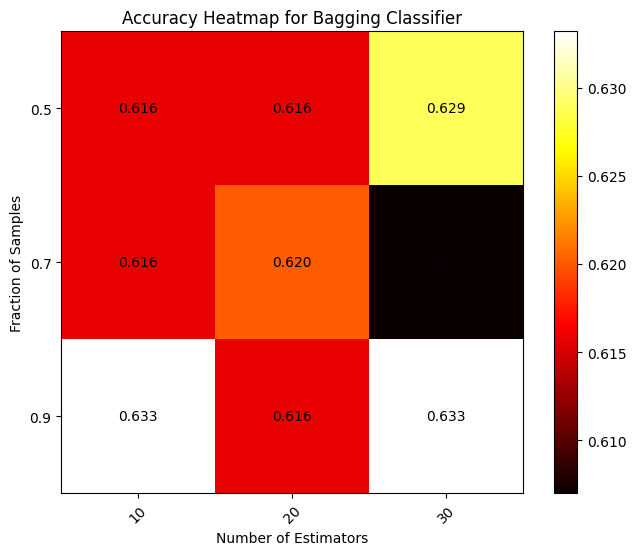

In [111]:
base_estimator = DecisionTreeClassifierClass

# Define values for the number of estimators and the fraction of samples
n_estimators_values = [10, 20, 30]
max_samples_values = [0.5, 0.7, 0.9]

# Create a 2D array to store accuracy values
accuracy_values = np.zeros((len(max_samples_values), len(n_estimators_values)))

# Loop through different values for the number of estimators and max samples
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        # Create the BaggingClassifier
        bagging_model = bagging_classification(base_estimator, n_estimators, max_samples, False, 'soft')
        accuracy_values[j, i] = bagging_model[0]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_values, interpolation='nearest', cmap=plt.cm.hot)
plt.title('Accuracy Heatmap for Bagging Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Fraction of Samples')
plt.colorbar()

# Display the accuracy values on each heatmap cell
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        plt.text(i, j, f'{accuracy_values[j, i]:.3f}', ha='center', va='center', color='black')

plt.xticks(np.arange(len(n_estimators_values)), n_estimators_values, rotation=45)
plt.yticks(np.arange(len(max_samples_values)), max_samples_values)
plt.show()

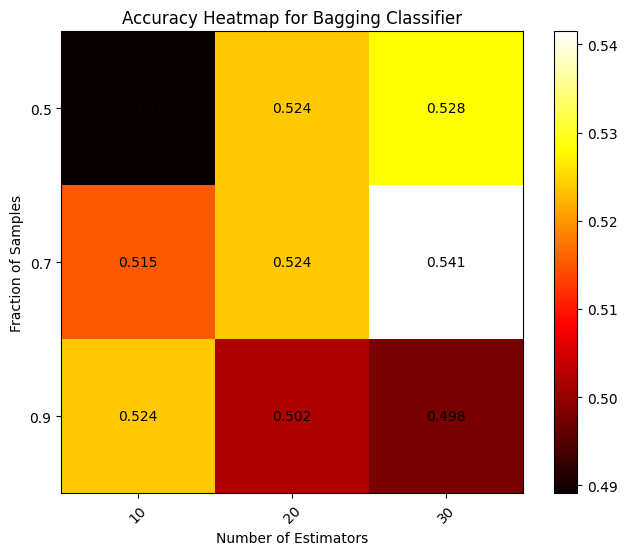

In [112]:
base_estimator = Logisitic_Regression

# Define values for the number of estimators and the fraction of samples
n_estimators_values = [10, 20, 30]
max_samples_values = [0.5, 0.7, 0.9]

# Create a 2D array to store accuracy values
accuracy_values = np.zeros((len(max_samples_values), len(n_estimators_values)))

# Loop through different values for the number of estimators and max samples
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        # Create the BaggingClassifier
        bagging_model = bagging_classification(base_estimator, n_estimators, max_samples, False, 'soft')
        accuracy_values[j, i] = bagging_model[0]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_values, interpolation='nearest', cmap=plt.cm.hot)
plt.title('Accuracy Heatmap for Bagging Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Fraction of Samples')
plt.colorbar()

# Display the accuracy values on each heatmap cell
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        plt.text(i, j, f'{accuracy_values[j, i]:.3f}', ha='center', va='center', color='black')

plt.xticks(np.arange(len(n_estimators_values)), n_estimators_values, rotation=45)
plt.yticks(np.arange(len(max_samples_values)), max_samples_values)
plt.show()

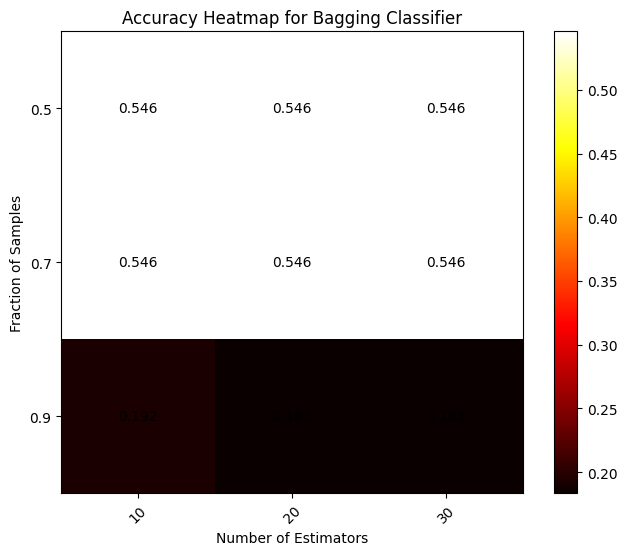

In [113]:
base_estimator = Mlp_Classification

# Define values for the number of estimators and the fraction of samples
n_estimators_values = [10, 20, 30]
max_samples_values = [0.5, 0.7, 0.9]

# Create a 2D array to store accuracy values
accuracy_values = np.zeros((len(max_samples_values), len(n_estimators_values)))

# Loop through different values for the number of estimators and max samples
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        # Create the BaggingClassifier
        bagging_model = bagging_classification(base_estimator, n_estimators, max_samples, False, 'soft')
        accuracy_values[j, i] = bagging_model[0]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_values, interpolation='nearest', cmap=plt.cm.hot)
plt.title('Accuracy Heatmap for Bagging Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Fraction of Samples')
plt.colorbar()

# Display the accuracy values on each heatmap cell
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_samples in enumerate(max_samples_values):
        plt.text(i, j, f'{accuracy_values[j, i]:.3f}', ha='center', va='center', color='black')

plt.xticks(np.arange(len(n_estimators_values)), n_estimators_values, rotation=45)
plt.yticks(np.arange(len(max_samples_values)), max_samples_values)
plt.show()

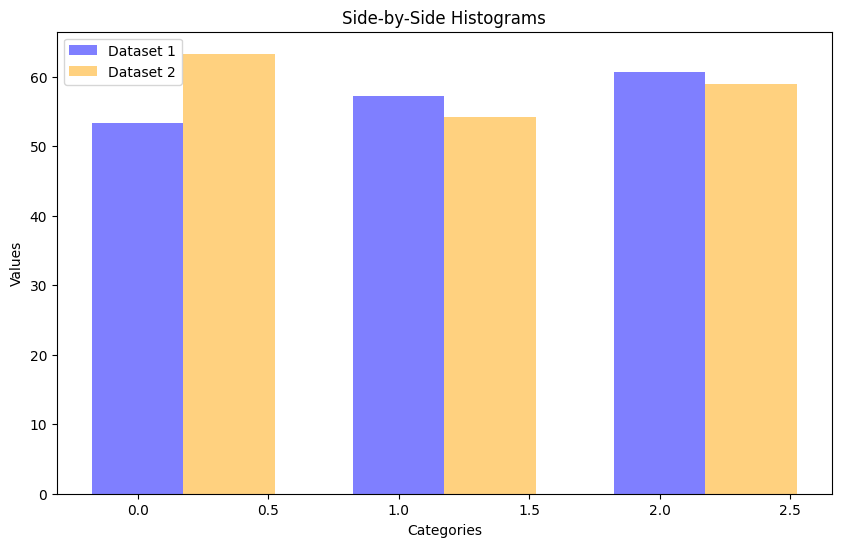

In [123]:
data1 = [53.27, 57.20, 60.69]
data2 = [63.31, 54.14, 58.95]
indices = np.arange(len(data1))

# Plotting side-by-side histograms
plt.figure(figsize=(10, 6))

bar_width = 0.35  # Adjust as needed

plt.bar(indices, data1, width=bar_width, alpha=0.5, label='Dataset 1', color='blue')
plt.bar(indices + bar_width, data2, width=bar_width, alpha=0.5, label='Dataset 2', color='orange')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Side-by-Side Histograms')
plt.legend()
plt.show()

In [18]:
def stacking_classification(level_0_estimators, level_1_estimator, stacking_method, samples):
    df = pd.read_csv('./WineQT.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["quality", "Id"])
    x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], df["quality"], test_size=0.2, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    ensemble_predictions_test = []

    indices = list(range(length))
    random.shuffle(indices)
    part_size = length // samples
    divided_indices = [indices[i:i + part_size] for i in range(0, length, part_size)]
    if len(divided_indices[0]) != len(divided_indices[-1]):
        divided_indices = divided_indices[:-1]
    divided_indices = np.array(divided_indices)

    flag = 0

    for base_estimator in level_0_estimators:
        if stacking_method == 'stacking':
            ensemble_predictions.append(y_train.copy().values)
            for i in range(0, samples):
                x_sampled_val = x_train.iloc[divided_indices[i].tolist()]
                y_sampled_val = y_train.iloc[divided_indices[i].tolist()]

                x_sampled_train = x_train.drop(x_train.index[divided_indices[i].tolist()])
                y_sampled_train = y_train.drop(y_train.index[divided_indices[i].tolist()])

                model_type = base_estimator()
                model = model_type.train_model(x_sampled_train, y_sampled_train)
                predictions = model_type.predict(model, x_sampled_val)
                predictions = predictions.reshape(-1,)
                ensemble_predictions[-1][divided_indices[i].tolist()] = predictions
            model_type = base_estimator()
            model = model_type.train_model(x_train, y_train)
            model = model_type.predict(model, x_test)
            accuracy, classification_rep = model_type.evaluate_model(y_test, model)
            model = model.reshape(-1,)
            ensemble_predictions_test.append(model)
            print(accuracy)
        else:
            x_sampled_val = x_train.iloc[divided_indices[-1].tolist()]
            y_sampled_val = y_train.iloc[divided_indices[-1].tolist()]

            x_sampled_train = x_train.drop(x_train.index[divided_indices[-1].tolist()])
            y_sampled_train = y_train.drop(y_train.index[divided_indices[-1].tolist()])

            if flag == 0:
                ensemble_predictions = x_sampled_val.copy().values
                ensemble_predictions_test = x_test.copy().values
                flag = 1

            model_type = base_estimator()
            model = model_type.train_model(x_sampled_train, y_sampled_train)
            predictions = model_type.predict(model, x_sampled_val)
            predictions = predictions.reshape(-1,)
            ensemble_predictions = np.c_[ensemble_predictions, np.array(predictions)]

            predictions = model_type.predict(model, x_test)
            predictions = predictions.reshape(-1,)
            ensemble_predictions_test = np.c_[ensemble_predictions_test, np.array(predictions)]

    ensemble_predictions = np.array(ensemble_predictions)
    ensemble_predictions_test = np.array(ensemble_predictions_test)

    if stacking_method == 'stacking':
        stacking_input = ensemble_predictions.T
        model_type = level_1_estimator()
        model = model_type.train_model(pd.DataFrame(stacking_input), y_train)
        predictions = model_type.predict(model, pd.DataFrame(ensemble_predictions_test.T))
        accuracy, classification_rep = model_type.evaluate_model(y_test, predictions)
    else:
        stacking_input = ensemble_predictions
        model_type = level_1_estimator()
        model = model_type.train_model(pd.DataFrame(stacking_input), y_train.iloc[divided_indices[-1].tolist()])
        predictions = model_type.predict(model, pd.DataFrame(ensemble_predictions_test))
        accuracy, classification_rep = model_type.evaluate_model(y_test, predictions)

    # if best_metric is None or mse < best_metric:
    #     best_metric = mse
    #     best_model = {
    #         "accuracy": accuracy,
    #         "classification_rep": classification_rep,
    #         "level_0_models": level_0_estimators,
    #         "level_1_model": level_1_estimator,
    #     }

    return accuracy, classification_rep

In [19]:
def stacking_regression(level_0_estimators, level_1_estimator, stacking_method, samples):
    df = pd.read_csv('./HousingData.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["MEDV"])
    x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.2, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    ensemble_predictions_test = []

    indices = list(range(length))
    random.shuffle(indices)
    part_size = length // samples
    divided_indices = [indices[i:i + part_size] for i in range(0, length, part_size)]
    if len(divided_indices[0]) != len(divided_indices[-1]):
        divided_indices = divided_indices[:-1]
    divided_indices = np.array(divided_indices)

    flag = 0

    for base_estimator in level_0_estimators:
        if stacking_method == 'stacking':
            ensemble_predictions.append(y_train.copy().values)
            for i in range(0, samples):
                x_sampled_val = x_train.iloc[divided_indices[i].tolist()]
                y_sampled_val = y_train.iloc[divided_indices[i].tolist()]

                x_sampled_train = x_train.drop(x_train.index[divided_indices[i].tolist()])
                y_sampled_train = y_train.drop(y_train.index[divided_indices[i].tolist()])

                model_type = base_estimator()
                model = model_type.train_model(x_sampled_train, y_sampled_train)
                predictions = model_type.predict(model, x_sampled_val)
                predictions = predictions.reshape(-1,)
                ensemble_predictions[-1][divided_indices[i].tolist()] = predictions

            model_type = base_estimator()
            model = model_type.train_model(x_train, y_train)
            model = model_type.predict(model, x_test)
            mse = model_type.evaluate_model(y_test, model)
            model = model.reshape(-1,)
            ensemble_predictions_test.append(model)
            print(mse)
        else:
            x_sampled_val = x_train.iloc[divided_indices[-1].tolist()]
            y_sampled_val = y_train.iloc[divided_indices[-1].tolist()]

            x_sampled_train = x_train.drop(x_train.index[divided_indices[-1].tolist()])
            y_sampled_train = y_train.drop(y_train.index[divided_indices[-1].tolist()])

            if flag == 0:
                ensemble_predictions = x_sampled_val.copy().values
                ensemble_predictions_test = x_test.copy().values
                flag = 1

            model_type = base_estimator()
            model = model_type.train_model(x_sampled_train, y_sampled_train)
            predictions = model_type.predict(model, x_sampled_val)
            predictions = predictions.reshape(-1,)
            ensemble_predictions = np.c_[ensemble_predictions, np.array(predictions)]

            predictions = model_type.predict(model, x_test)
            predictions = predictions.reshape(-1,)
            ensemble_predictions_test = np.c_[ensemble_predictions_test, np.array(predictions)]

    ensemble_predictions = np.array(ensemble_predictions)
    ensemble_predictions_test = np.array(ensemble_predictions_test)

    if stacking_method == 'stacking':
        stacking_input = ensemble_predictions.T
        model_type = level_1_estimator()
        model = model_type.train_model(pd.DataFrame(stacking_input), y_train)
        predictions = model_type.predict(model, pd.DataFrame(ensemble_predictions_test.T))
        mse = model_type.evaluate_model(y_test, predictions)
    else:
        stacking_input = ensemble_predictions
        model_type = level_1_estimator()
        model = model_type.train_model(pd.DataFrame(stacking_input), y_train.iloc[divided_indices[-1].tolist()])
        predictions = model_type.predict(model, pd.DataFrame(ensemble_predictions_test))
        mse = model_type.evaluate_model(y_test, predictions)

    # if best_metric is None or mse < best_metric:
    #     best_metric = mse
    #     best_model = {
    #         "accuracy": accuracy,
    #         "classification_rep": classification_rep,
    #         "level_0_models": level_0_estimators,
    #         "level_1_model": level_1_estimator,
    #     }

    return mse

In [78]:
best_model = stacking_classification([DecisionTreeClassifierClass, Mlp_Classification, Logisitic_Regression], DecisionTreeClassifierClass, 'stacking', 4)
print(best_model[0])

0.5327510917030568
0.6069868995633187
0.5764192139737991
0.5982532751091703


In [79]:
best_model = stacking_regression([DecisionTreeRegressionClass, Mlp_Regression, LinearRegressionClass], LinearRegressionClass, 'stacking', 4)
print(best_model)

25.98235294117647
17.621713731340847
25.056114338834035
13.437715708319281


In [80]:
best_model = stacking_classification([DecisionTreeClassifierClass, Mlp_Classification, Logisitic_Regression], DecisionTreeClassifierClass, 'blending', 4)
print(best_model[0])

0.5414847161572053


In [81]:
best_model = stacking_regression([DecisionTreeRegressionClass, Mlp_Regression, LinearRegressionClass], LinearRegressionClass, 'blending', 4)
print(best_model)

17.218566123033952


In [83]:
min_accuracy = 0
for model in [DecisionTreeClassifierClass, Logisitic_Regression]:
    for samples in [2, 4, 8]:
        for method in ['stacking', 'blending']:
                best_model = stacking_classification([DecisionTreeClassifierClass, Mlp_Classification, Logisitic_Regression], model, method, samples)
                if best_model[0] > min_accuracy:
                    best_model_stacking_classification = {
                        'model': model,
                        'sample': samples,
                        'method': method,
                        'accuracy': best_model[0]
                    }
                    min_acc = accuracy
print(best_model_stacking_classification)

0.5327510917030568
0.6069868995633187
0.5720524017467249
0.5327510917030568
0.6069868995633187
0.5764192139737991
0.5327510917030568
0.6069868995633187
0.5720524017467249
0.5327510917030568
0.6069868995633187
0.5720524017467249
0.5327510917030568
0.6069868995633187
0.5764192139737991
0.5327510917030568
0.6069868995633187
0.5720524017467249
{'model': <class '__main__.Logisitic_Regression'>, 'sample': 8, 'method': 'blending', 'accuracy': 0.5938864628820961}


In [115]:
min_accuracy = 0
for model in [DecisionTreeClassifierClass]:
    for samples in [2, 4, 8]:
        for method in ['stacking', 'blending']:
                best_model = stacking_classification([DecisionTreeClassifierClass, Mlp_Classification, Logisitic_Regression], model, method, samples)
                if best_model[0] > min_accuracy:
                    best_model_stacking_classification = {
                        'model': model,
                        'sample': samples,
                        'method': method,
                        'accuracy': best_model[0]
                    }
                    min_acc = accuracy
print(best_model_stacking_classification)

0.5327510917030568
0.6069868995633187
0.5720524017467249
0.5327510917030568
0.6069868995633187
0.5764192139737991
0.5327510917030568
0.6069868995633187
0.5720524017467249
{'model': <class '__main__.DecisionTreeClassifierClass'>, 'sample': 8, 'method': 'blending', 'accuracy': 0.5283842794759825}


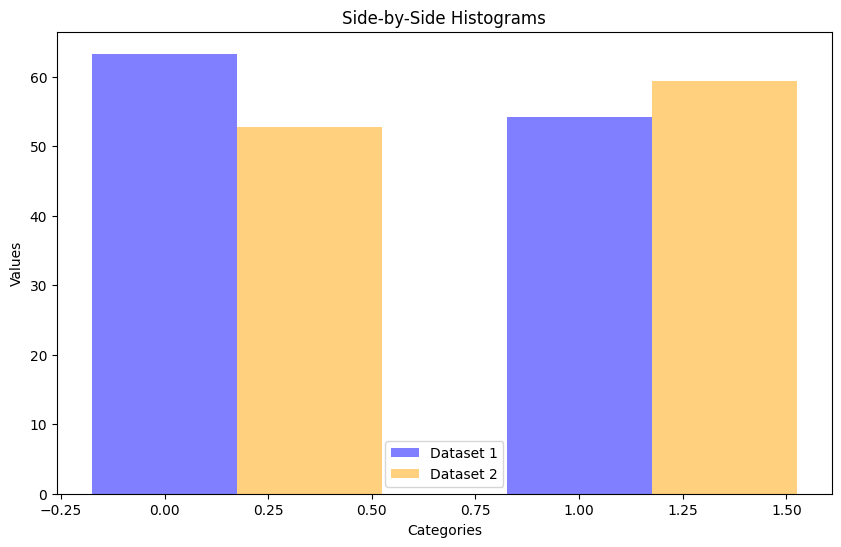

In [124]:
data1 = [63.31, 54.14]
data2 = [52.83, 59.38]
indices = np.arange(len(data1))

# Plotting side-by-side histograms
plt.figure(figsize=(10, 6))

bar_width = 0.35  # Adjust as needed

plt.bar(indices, data1, width=bar_width, alpha=0.5, label='Dataset 1', color='blue')
plt.bar(indices + bar_width, data2, width=bar_width, alpha=0.5, label='Dataset 2', color='orange')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Side-by-Side Histograms')
plt.legend()
plt.show()

In [84]:
max_mse = 100
for model in [DecisionTreeRegressionClass, LinearRegressionClass]:
    for samples in [2, 4, 8]:
        for method in ['stacking', 'blending']:
                best_model = stacking_regression([DecisionTreeRegressionClass, Mlp_Regression, LinearRegressionClass], model, method, samples)
                if best_model < max_mse:
                    best_model_stacking_regression = {
                        'model': model,
                        'sample': samples,
                        'method': method,
                        'mse': mse
                    }
                    min_acc = accuracy
print(best_model_stacking_regression)

25.98235294117647
17.621713731340847
25.056114338834035
25.98235294117647
17.621713731340847
25.056114338834035
25.98235294117647
17.621713731340847
25.056114338834035
25.98235294117647
17.621713731340847
25.056114338834035
25.98235294117647
17.621713731340847
25.056114338834035
25.98235294117647
17.621713731340847
25.056114338834035
{'model': <class '__main__.LinearRegressionClass'>, 'sample': 8, 'method': 'blending', 'mse': 24.89099195970116}


In [85]:
def random_forest_classification(n_estimators, samples, bootstrap):
    base_model = DecisionTreeClassifierClass
    df = pd.read_csv('./WineQT.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["quality", "Id"])
    x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], df["quality"], test_size=0.4, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_val.fillna(x_val.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_val = std_scaler.transform(x_val)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_val = pd.DataFrame(x_val)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    for _ in range(n_estimators):
        sample_indices = np.random.choice(len(x_train), size=int(samples * length), replace=False)
        x_sampled = x_train.iloc[sample_indices]
        y_sampled = y_train.iloc[sample_indices]

        if bootstrap:
            x_train = x_train.drop(x_train.index[sample_indices])
            y_train = y_train.drop(y_train.index[sample_indices])
        
        model_type = base_model()
        model = model_type.train_model(x_sampled, y_sampled)
        predictions = model_type.predict(model, x_test)
        predictions = predictions.reshape(-1,)
        ensemble_predictions.append(predictions)
    data_transposed = np.array(ensemble_predictions).T
    most_frequent_elements = []
    for col in data_transposed:
        most_common_element = np.bincount(col).argmax()
        most_frequent_elements.append(most_common_element)
    final_predictions = np.array(most_frequent_elements)
    model_type = base_model()
    accuracy, classification_rep = model_type.evaluate_model(y_test, final_predictions)
    return accuracy, classification_rep

In [86]:
def random_forest_regression(n_estimators, samples, bootstrap):
    base_model = DecisionTreeRegressionClass
    df = pd.read_csv('./HousingData.csv')
    data_standardized = df
    features = data_standardized.columns.difference(["MEDV"])
    x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.4, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    x_train.fillna(x_train.mean(), inplace=True) 
    x_val.fillna(x_val.mean(), inplace=True) 
    x_test.fillna (x_test.mean(), inplace=True)
    std_scaler = StandardScaler() 
    x_train = std_scaler.fit_transform(x_train)
    x_val = std_scaler.transform(x_val)
    x_test = std_scaler.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_val = pd.DataFrame(x_val)
    x_test = pd.DataFrame(x_test)
    length = len(x_train)

    ensemble_predictions = []
    for _ in range(n_estimators):
        sample_indices = np.random.choice(len(x_train), size=int(samples * length), replace=False)
        x_sampled = x_train.iloc[sample_indices]
        y_sampled = y_train.iloc[sample_indices]

        if bootstrap:
            x_train = x_train.drop(x_train.index[sample_indices])
            y_train = y_train.drop(y_train.index[sample_indices])
        
        model_type = base_model()
        model = model_type.train_model(x_sampled, y_sampled)
        predictions = model_type.predict(model, x_test)
        predictions = predictions.reshape(-1,)
        ensemble_predictions.append(predictions)

    final_predictions = np.mean(ensemble_predictions, axis=0)
    model_type = base_model()
    mse = model_type.evaluate_model(y_test, final_predictions)
    return mse

In [87]:
accuracy, classification_rep = random_forest_classification(15, 0.6, False)
print(accuracy)
print(classification_rep)

0.5895196506550219
              precision    recall  f1-score   support

           4       0.00      0.00      1.00         9
           5       0.61      0.72      0.66        97
           6       0.56      0.53      0.54        93
           7       0.60      0.58      0.59        26
           8       1.00      0.25      0.40         4

    accuracy                           0.59       229
   macro avg       0.55      0.42      0.64       229
weighted avg       0.57      0.59      0.61       229



In [88]:
mse = random_forest_regression(15, 0.6, False)
print(mse)

13.057855773420489


In [92]:
min_accuracy = 0
for n_e in [1, 5, 10, 100]:
    for samples in [0.5, 0.6, 0.8]:
            accuracy, classification_rep = random_forest_classification(n_e, samples, bs)
            if accuracy > min_accuracy:
                best_model_rf_classification = {
                    'n_e': n_e,
                    'sample': samples,
                    'bs': bs,
                    'accuracy': accuracy
                }
                min_acc = accuracy
print(best_model_rf_classification)

{'n_e': 100, 'sample': 0.8, 'bs': False, 'accuracy': 0.5982532751091703}


In [93]:
max_mse = 100
for n_e in [1, 5, 10, 100]:
    for samples in [0.5, 0.6, 0.8]:
            mse = random_forest_regression(15, 0.6, False)
            if mse < max_mse:
                best_model_rf_regression = {
                    'n_e': n_e,
                    'sample': samples,
                    'bs': bs,
                    'mse': mse
                }
                min_acc = accuracy
print(best_model_rf_regression)

{'n_e': 100, 'sample': 0.8, 'bs': False, 'mse': 11.048518954248365}


In [10]:
def adaboost_classification(number_of_layers, threshold):
    df = pd.read_csv('./WineQT.csv')
    df['quality'] -= 3
    data_standardized = df.copy()
    features = data_standardized.columns.difference(["quality", "Id"])
    data_standardized = data_standardized[features]
    data_standardized.fillna(data_standardized.mean(), inplace=True)
    std_scaler = StandardScaler()
    data_standardized = std_scaler.fit_transform(data_standardized)
    data_standardized = pd.DataFrame(data_standardized)
    df[features] = data_standardized.copy()
    x_train, x_test, y_train, y_test = train_test_split(df[features], df["quality"], test_size=0.2, random_state=42)
    x_train['prob'] = 1 / x_train.shape[0]
    # print(x_train)

    alphas = []
    predictions = []
    models = []
    for _ in range(0, number_of_layers):
        # print(np.sum(x_train['prob']))
        # x_train1 = x_train.sample(frac=0.8, replace=True, weights=x_train['prob'], random_state=42)
        # print(x_train1)
        # x_train = x_train1[features].copy()
        # y_train = x_train1['quality'].copy()
        
        model = DecisionTreeClassifier(random_state=42, max_depth=(y_train.nunique() - 1))
        model_fitted = model.fit(x_train[features], y_train, sample_weight=x_train['prob'])
        x_train['pred'] = model_fitted.predict(x_train[features])
        x_train['misclassified'] = (y_train != x_train['pred'])
        models.append(model_fitted)
        print(accuracy_score(y_train, x_train['pred']))
        # print(x_train['pred'])
        # print((x_train['misclassified']))

        total_error = sum(x_train['misclassified'] * x_train['prob'])
        print(total_error)
        alpha1 = np.log((1-total_error) / total_error) + np.log(y_train.nunique() - 1)
        alphas.append(alpha1)
        # print(alpha1)

        new_weights = x_train['prob'] * np.exp(-1 * alpha1 * x_train['misclassified'])
        new_weights /= sum(new_weights)
        x_train['prob'] = new_weights
        # print(df['prob'])
        if total_error < threshold:
            break
    for i, model in enumerate(models):
        predictions.append(model.predict(x_test))
    predictions = np.array(predictions)
    alphas = np.array(alphas)
    # print((predictions).shape)
    # print(alphas[:, np.newaxis])
    final_final_predictions = []
    for i in range(y_test.nunique()):
        # print(i)
        final_predictions = predictions.copy()
        # print(final_predictions)
        cnd = final_predictions.copy()
        final_predictions[cnd==i] = 1
        final_predictions[cnd!=i] = 0
        # print(final_predictions)
        final_predictions = final_predictions * alphas[:, np.newaxis]
        final_predictions = final_predictions.sum(axis = 0)
        final_predictions = (final_predictions.reshape(-1,))
        final_final_predictions.append(final_predictions)
    final_final_predictions = np.array(final_final_predictions)
    # print(final_final_predictions)
    ind = np.argmax(final_final_predictions, axis=0)
    # print(ind)
    accuracy = accuracy_score(y_test, ind)
    classification_rep = classification_report(y_test, ind, zero_division=1.0)
    return accuracy, classification_rep

In [11]:
def adaboost_classification_prediction(number_of_layers, threshold):
    df = pd.read_csv('./WineQT.csv')
    df['quality'] -= 3
    data_standardized = df.copy()
    features = data_standardized.columns.difference(["quality", "Id"])
    data_standardized = data_standardized[features]
    data_standardized.fillna(data_standardized.mean(), inplace=True)
    std_scaler = StandardScaler()
    data_standardized = std_scaler.fit_transform(data_standardized)
    data_standardized = pd.DataFrame(data_standardized)
    df[features] = data_standardized.copy()
    x_train, x_test, y_train, y_test = train_test_split(df[features], df["quality"], test_size=0.2, random_state=42)
    x_train['prob'] = 1 / x_train.shape[0]
    # print(x_train)

    alphas = []
    predictions = []
    models = []
    for _ in range(0, number_of_layers):
        # print(np.sum(x_train['prob']))
        # x_train1 = x_train.sample(frac=0.8, replace=True, weights=x_train['prob'], random_state=42)
        # print(x_train1)
        # x_train = x_train1[features].copy()
        # y_train = x_train1['quality'].copy()
        
        model = DecisionTreeClassifier(random_state=42, max_depth=(y_train.nunique() - 1))
        model_fitted = model.fit(x_train[features], y_train, sample_weight=x_train['prob'])
        x_train['pred'] = model_fitted.predict(x_train[features])
        x_train['misclassified'] = (y_train != x_train['pred'])
        models.append(model_fitted)
        print(accuracy_score(y_train, x_train['pred']))
        # print(x_train['pred'])
        # print((x_train['misclassified']))

        total_error = sum(x_train['misclassified'] * x_train['prob'])
        print(total_error)
        alpha1 = np.log((1-total_error) / total_error) + np.log(y_train.nunique() - 1)
        alphas.append(alpha1)
        # print(alpha1)

        new_weights = x_train['prob'] * np.exp(-1 * alpha1 * x_train['misclassified'])
        new_weights /= sum(new_weights)
        x_train['prob'] = new_weights
        # print(df['prob'])
        if total_error < threshold:
            break
    for i, model in enumerate(models):
        predictions.append(model.predict(x_test))
    predictions = np.array(predictions)
    alphas = np.array(alphas)
    # print((predictions).shape)
    # print(alphas[:, np.newaxis])
    final_final_predictions = []
    for i in range(y_test.nunique()):
        # print(i)
        final_predictions = predictions.copy()
        # print(final_predictions)
        cnd = final_predictions.copy()
        final_predictions[cnd==i] = 1
        final_predictions[cnd!=i] = 0
        # print(final_predictions)
        final_predictions = final_predictions * alphas[:, np.newaxis]
        final_predictions = final_predictions.sum(axis = 0)
        final_predictions = (final_predictions.reshape(-1,))
        final_final_predictions.append(final_predictions)
    final_final_predictions = np.array(final_final_predictions)
    # print(final_final_predictions)
    ind = np.argmax(final_final_predictions, axis=0)
    # print(ind)
    accuracy = accuracy_score(y_test, ind)
    classification_rep = classification_report(y_test, ind, zero_division=1.0)
    return y_test, ind

In [95]:
adaboost_classification(10, 1e-10)

0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18


(0.6157205240174672,
 '              precision    recall  f1-score   support\n\n           1       0.00      0.00      1.00         6\n           2       0.71      0.69      0.70        96\n           3       0.59      0.70      0.64        99\n           4       0.33      0.23      0.27        26\n           5       1.00      0.00      0.00         2\n\n    accuracy                           0.62       229\n   macro avg       0.53      0.32      0.52       229\nweighted avg       0.60      0.62      0.63       229\n')

In [135]:
adaboost_classification_estimators = []
adaboost_classification_time = []
for n_e in [10, 50, 100, 200]:
    start_time = time.time()
    accuracy, classification_rep = adaboost_classification(n_e, 1e-10)
    adaboost_classification_estimators.append(n_e)
    adaboost_classification_time.append(time.time() - start_time)

0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18


In [116]:
for n_e in [10, 50, 100, 200]:
    accuracy, classification_rep = adaboost_classification(n_e, 1e-10)
    print(n_e, accuracy)

0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
10 0.6157205240174672
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
50 0.6157205240174672
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18
100 0.6157205240174672
0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.676148796

In [97]:
def weighted_median(data, weights):
    if len(weights) != data.shape[0]:
        raise ValueError("Length of weights array must match the number of columns in data.")
    sorted_data = np.sort(data, axis=0)
    cumulative_weights = np.cumsum(weights)
    median_indices = np.argmax(cumulative_weights >= 0.5 * cumulative_weights[-1])
    median_values = sorted_data[median_indices, :]
    return median_values

In [98]:
def adaboost_regression(number_of_layers):
    df = pd.read_csv('./HousingData.csv')
    data_standardized = df.copy()
    features = data_standardized.columns.difference(["MEDV"])
    data_standardized = data_standardized[features]
    data_standardized.fillna(data_standardized.mean(), inplace=True)
    std_scaler = StandardScaler()
    data_standardized = std_scaler.fit_transform(data_standardized)
    data_standardized = pd.DataFrame(data_standardized)
    df[features] = data_standardized.copy()
    x_train, x_test, y_train, y_test = train_test_split(df[features], df["MEDV"], test_size=0.2, random_state=42)
    x_train['prob'] = 1 / x_train.shape[0]

    betas = []
    predictions = []
    for _ in range(0, number_of_layers):
        model = DecisionTreeRegressor(random_state=42, max_depth=10)
        model_fitted = model.fit(x_train[features], y_train, sample_weight=x_train['prob'])
        predicted = model_fitted.predict(x_train[features])
        x_train['pred'] = predicted
        e = abs(y_train - predicted) / max(abs(y_train - predicted))
        epsilon = np.sum(e * x_train['prob'].copy().values)
        if epsilon >= 0.5:
            break
        beta = epsilon / (1 - epsilon)
        x_train['prob'] = (x_train['prob'] * np.power(beta, 1 - e)) / np.sum(x_train['prob'] * np.power(beta, 1 - e))
        betas.append(np.log(1 / beta))
        predictions.append(model_fitted.predict(x_test))
    predictions = np.array(predictions)
    betas = np.array(betas)
    ind = weighted_median(predictions, betas)
    mse = mean_squared_error(y_test, ind)
    return mse

In [99]:
adaboost_regression(100)

5.742656465412369

In [100]:
adaboost_regression_estimators = []
adaboost_regression_time = []
for n_e in [10, 50, 100, 200]:
    start_time = time.time()
    mse = adaboost_regression(n_e)
    adaboost_regression_estimators.append(n_e)
    adaboost_regression_time.append(time.time() - start_time)

In [12]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate

    def preprocess(self):
        df = pd.read_csv('./WineQT.csv')
        df['quality'] -= 3
        data_standardized = df
        features = data_standardized.columns.difference(["quality", "Id"])
        x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], df["quality"], test_size=0.4, random_state=42)
        x_train.fillna(x_train.mean(), inplace=True) 
        x_test.fillna (x_test.mean(), inplace=True)
        std_scaler = StandardScaler() 
        x_train = std_scaler.fit_transform(x_train)
        x_test = std_scaler.transform(x_test)
        x_train = pd.DataFrame(x_train)
        x_test = pd.DataFrame(x_test)
        return x_train, y_train, x_test, y_test

    def fit(self, X, y):
        self.trees = []
        predictions = np.log(y.mean()/(1-y.mean()))
        self.starting_point = predictions
        predictions = np.full(len(y), predictions)
        # output = np.mean(y)
        for _ in range(self.n_estimators):
            p = np.exp(predictions) / (1 + np.exp(predictions))
            residuals = y - p
            model = DecisionTreeRegressor(max_leaf_nodes=100)
            model.fit(X, residuals)
            model_predictions = model.apply(X)
            for j in np.unique(model_predictions):
              fltr = model_predictions == j
              num = residuals[fltr].sum()
              den = (p[fltr]*(1-p[fltr])).sum()
              gamma = num / den
              predictions[fltr] += self.learning_rate * gamma
              model.tree_.value[j, 0, 0] = gamma
            self.trees.append(model)

    def predict(self, X):
        predictions = np.full(len(X), self.starting_point)
        for i in range(self.n_estimators):
            predictions += self.learning_rate * self.trees[i].predict(X)
        return np.exp(predictions) / (1 + np.exp(predictions))

    def do_boosting_for_one_class(self, x_train, y_train, x_test):
        predicted = self.fit(x_train, y_train)
        return self.predict(x_test)
    
    def evaluate(self, y_test, predicted):
        accuracy = accuracy_score(y_test, predicted)
        classification_rep = classification_report(y_test, predicted, zero_division=1.0)
        return accuracy, classification_rep
    
    def do_boosting(self):
        x_train, y_train, x_test, y_test = self.preprocess()
        final_output = []
        classes = np.unique(y_train)
        for class_label in classes:
            binary_y = np.where(y_train == class_label, 1, 0)
            predicted = self.do_boosting_for_one_class(x_train, binary_y, x_test)
            final_output.append(predicted)
        # print(final_output)
        final_output = np.argmax(final_output, axis = 0)
        # print(final_output)
        return self.evaluate(y_test, final_output)
    
    def do_boosting_prediction(self):
        x_train, y_train, x_test, y_test = self.preprocess()
        final_output = []
        classes = np.unique(y_train)
        for class_label in classes:
            binary_y = np.where(y_train == class_label, 1, 0)
            predicted = self.do_boosting_for_one_class(x_train, binary_y, x_test)
            final_output.append(predicted)
        # print(final_output)
        final_output = np.argmax(final_output, axis = 0)
        # print(final_output)
        return y_test, final_output

In [102]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.do_boosting()[0]

0.5720524017467249

In [134]:
gd_classification_estimators = []
gd_classification_time = []
for n_e in [10, 50, 100, 200]:
    start_time = time.time()
    gbc = GradientBoostingClassifier(n_estimators=n_e, learning_rate=0.1)
    gbc.do_boosting()[0]
    gd_classification_estimators.append(n_e)
    gd_classification_time.append(time.time() - start_time)

In [125]:
for n_e in [10, 50, 100, 200]:
    gbc = GradientBoostingClassifier(n_estimators=n_e, learning_rate=0.1)
    accuracy = gbc.do_boosting()[0]
    print(n_e, accuracy)

10 0.5720524017467249
50 0.5589519650655022
100 0.5786026200873362
200 0.5698689956331878


In [104]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def preprocess(self):
        df = pd.read_csv('./HousingData.csv')
        data_standardized = df
        features = data_standardized.columns.difference(["MEDV"])
        x_train, x_test, y_train, y_test = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.4, random_state=42)
        x_train.fillna(x_train.mean(), inplace=True) 
        x_test.fillna (x_test.mean(), inplace=True)
        std_scaler = StandardScaler() 
        x_train = std_scaler.fit_transform(x_train)
        x_test = std_scaler.transform(x_test)
        x_train = pd.DataFrame(x_train)
        x_test = pd.DataFrame(x_test)
        return x_train, y_train, x_test, y_test

    def fit(self, X, y, x_test):
        predictions = np.zeros_like(y) + np.mean(y)
        output = np.mean(y)
        for _ in range(self.n_estimators):
            residuals = y - predictions
            model = DecisionTreeRegressor(max_leaf_nodes=8)
            model.fit(X, residuals)
            model_predictions = model.predict(X)
            predictions += self.learning_rate * model_predictions
            model_predictions = model.predict(x_test)
            output += self.learning_rate * model_predictions
        return output

    def predict(self, X, model):
        return model.predict(X)
    
    def evaluate(self, y_test, predicted):
        mse = mean_squared_error(y_test, predicted)
        return mse

    def do_boosting(self):
        x_train, y_train, x_test, y_test = self.preprocess()
        predicted = self.fit(x_train, y_train, x_test)
        return self.evaluate(y_test, predicted)

In [105]:
gbc = GradientBoostingRegressor()
gbc.do_boosting()

7.6800146674229

In [119]:
gd_regression_estimators = []
gd_regression_time = []
for n_e in [10, 50, 100, 200]:
    start_time = time.time()
    gbc = GradientBoostingRegressor(n_estimators=n_e)
    gbc.do_boosting()
    gd_regression_estimators.append(n_e)
    gd_regression_time.append(time.time() - start_time)

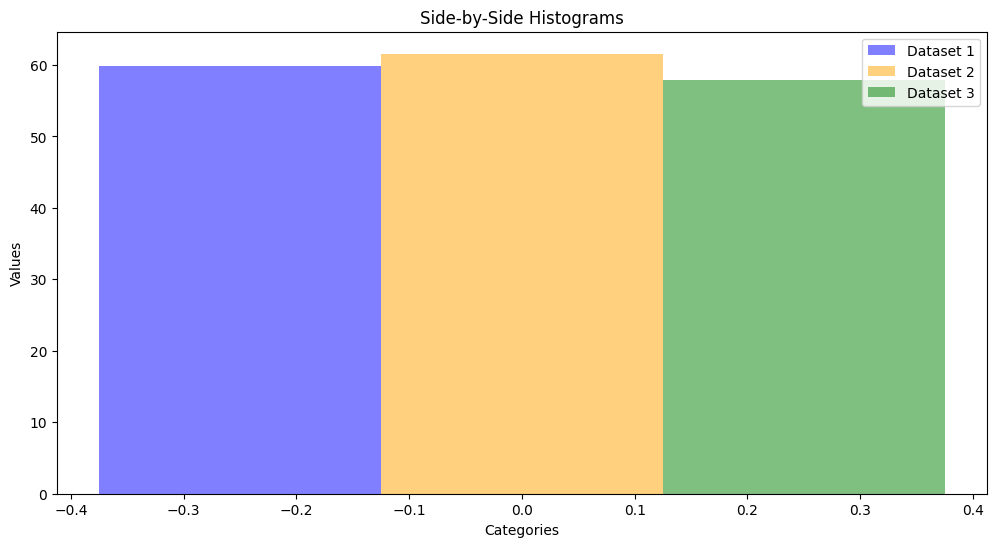

In [127]:
data1 = [59.82]
data2 = [61.57]
data3 = [57.86]
indices = np.arange(len(data1))

indices = np.arange(len(data1))

# Plotting side-by-side histograms
plt.figure(figsize=(12, 6))

bar_width = 0.25  # Adjust as needed

plt.bar(indices - bar_width, data1, width=bar_width, alpha=0.5, label='Dataset 1', color='blue')
plt.bar(indices, data2, width=bar_width, alpha=0.5, label='Dataset 2', color='orange')
plt.bar(indices + bar_width, data3, width=bar_width, alpha=0.5, label='Dataset 3', color='green')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Side-by-Side Histograms')
plt.legend()
plt.show()

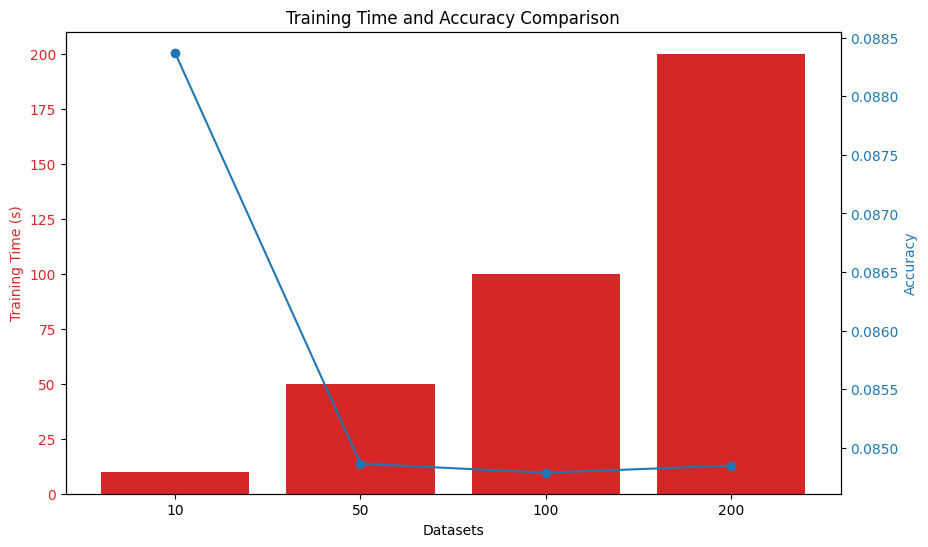

In [138]:
datasets = ['10', '50', '100', '200']
training_time = adaboost_classification_estimators
accuracy = adaboost_classification_time

indices = np.arange(len(datasets))

# Plotting training time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Datasets')
ax1.set_ylabel('Training Time (s)', color=color)
ax1.bar(indices, training_time, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(indices, accuracy, marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Time and Accuracy Comparison')
plt.xticks(indices, datasets)
plt.show()

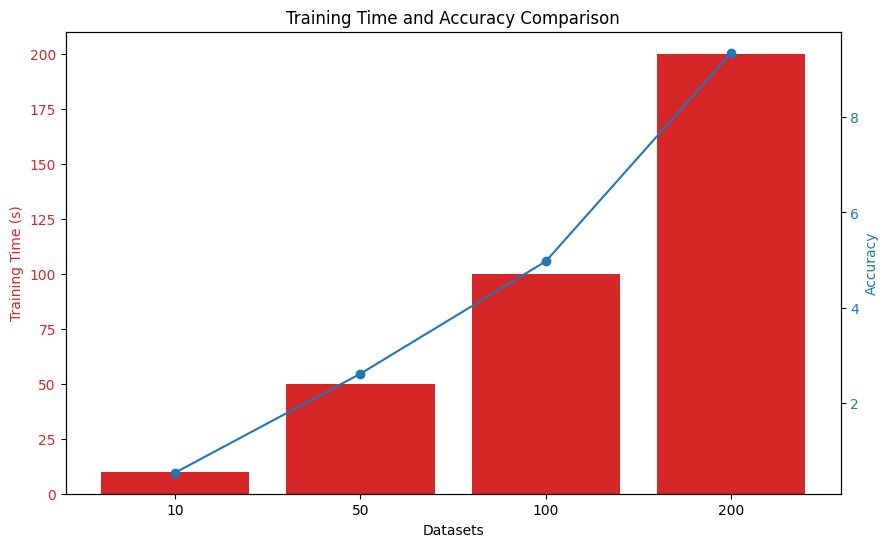

In [139]:
datasets = ['10', '50', '100', '200']
training_time = gd_classification_estimators
accuracy = gd_classification_time

indices = np.arange(len(datasets))

# Plotting training time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Datasets')
ax1.set_ylabel('Training Time (s)', color=color)
ax1.bar(indices, training_time, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(indices, accuracy, marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Time and Accuracy Comparison')
plt.xticks(indices, datasets)
plt.show()

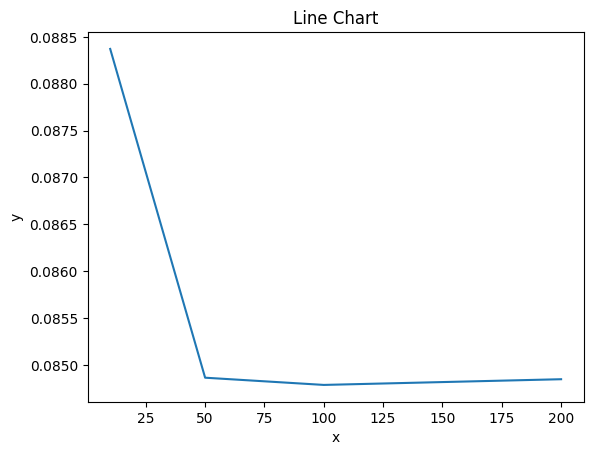

In [141]:
x = adaboost_classification_estimators
y = adaboost_classification_time

# Plot the line chart
plt.plot(x, y)

# Set the title of the graph
plt.title('Line Chart')

# Set the labels for the x and y axes
plt.xlabel('x')
plt.ylabel('y')

# Show the graph
plt.show()

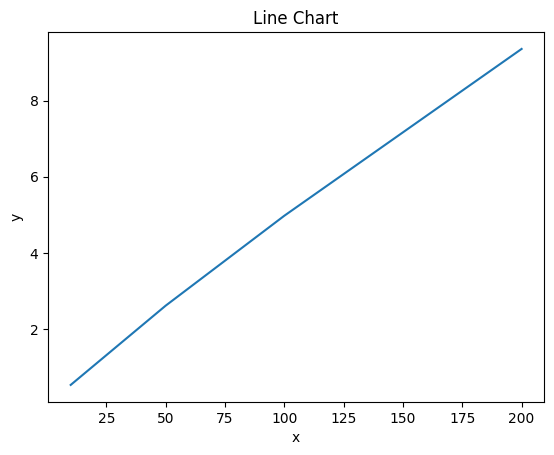

In [140]:
x = gd_classification_estimators
y = gd_classification_time

# Plot the line chart
plt.plot(x, y)

# Set the title of the graph
plt.title('Line Chart')

# Set the labels for the x and y axes
plt.xlabel('x')
plt.ylabel('y')

# Show the graph
plt.show()

## Analysis of Mistakes in Gradient Boosting + Decision Trees

### Common Mistakes:
1. *Overfitting:*
   - *Issue:* Gradient boosting can be prone to overfitting, especially if the base decision trees are deep.
   - *Explanation:* As each tree corrects the errors of the previous ones, if the trees are too complex, they can capture noise in the data, leading to overfitting.

2. *Sensitivity to Noisy Data:*
   - *Issue:* Gradient boosting can be sensitive to outliers and noisy data.
   - *Explanation:* Outliers can have a substantial impact on the model, and since boosting focuses on correcting errors, it might give too much weight to outliers.

3. *Computationally Intensive:*
   - *Issue:* Training a large number of decision trees can be computationally expensive.
   - *Explanation:* Gradient boosting involves sequentially adding trees to correct errors, and each tree is trained to minimize the residual errors. This sequential nature makes it more computationally intensive compared to parallel methods.

### Feature Similarity in Common Mistakes:

1. *Tree Structure:*
   - Both models rely on decision trees, and the structure of these trees can contribute to overfitting. If decision trees are allowed to grow too deep or are not pruned properly, they may capture noise instead of underlying patterns.

2. *Error Correction:*
   - Both models work by sequentially correcting errors made by the previous models. If the errors are noisy or if there's overfitting in the individual trees, this sequential correction might lead to an overly complex final model.

3. *Sensitivity to Outliers:*
   - Since both models aim to correct errors, they can be sensitive to outliers. Outliers may introduce noise that the models try to fit, leading to suboptimal generalization.
4. *Ensemble Nature:*
   - Both models are ensemble methods that combine weak learners to create a strong learner. While this can improve predictive performance, it also introduces complexities, such as potential overfitting and sensitivity to noisy data.

## Analysis of Mistakes in Adaboost + Decision Trees

### Common Mistakes:

1. *Overfitting:*
   - *Issue:* Adaboost can be susceptible to overfitting, especially if the base learners are too complex.
   - *Explanation:* Similar to gradient boosting, Adaboost focuses on correcting misclassifications by assigning higher weights to misclassified instances. If the base learners are too complex, they might overfit to the training data.

2. *Noisy Data Impact:*
   - *Issue:* Adaboost is sensitive to noisy data and outliers.
   - *Explanation:* As Adaboost gives more weight to misclassified instances, noisy data points or outliers can significantly influence the model's decision boundaries.

3. *Computational Complexity:*
   - *Issue:* Training multiple weak learners sequentially can be computationally expensive.
   - *Explanation:* Adaboost builds an ensemble by giving more weight to misclassified instances. This sequential process may be time-consuming, especially if the weak learners are computationally expensive.

### Feature Similarity in Common Mistakes:

1. *Weak Learners:*
   - Both models rely on decision trees as weak learners. If these trees are too complex or not properly constrained, they can contribute to overfitting.

2. *Error Correction:*
   - Both Adaboost and gradient boosting work by iteratively correcting errors made by the previous models. This sequential correction can be a source of overfitting if the base learners are too flexible.
3. *Sensitivity to Noisy Data:*
   - Both models are sensitive to noisy data and outliers. Since they focus on correcting errors, noisy data points may have a disproportionate influence on the final model.

4. *Ensemble Nature:*
   - Adaboost, like gradient boosting, is an ensemble method. The ensemble nature can lead to overfitting if not properly regularized or if weak learners are too complex.

### Overall Similarities:
Both models share similarities in terms of their reliance on decision trees, sequential error correction, and sensitivity to noisy data. Ensuring proper regularization of base learners, limiting tree depth, and considering the impact of outliers are crucial for mitigating these common mistakes in both gradient boosting and Adaboost with decision trees.

0.6816192560175055
0.31838074398249455
0.6761487964989059
0.08296540902551075
0.6706783369803063
0.02378513321999547
0.6761487964989059
0.0001183683217682536
0.6761487964989059
2.802875415839265e-09
0.6761487964989059
1.5712221281511281e-18


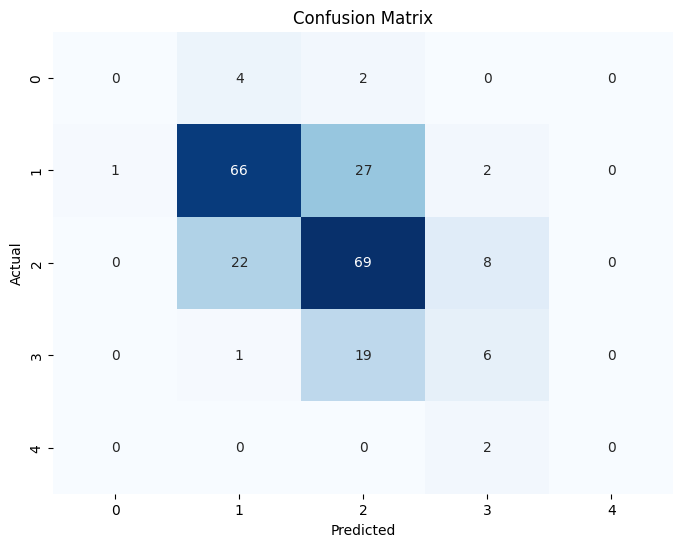

In [13]:
actual_labels, predicted_labels = adaboost_classification_prediction(10, 1e-10)

cm = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

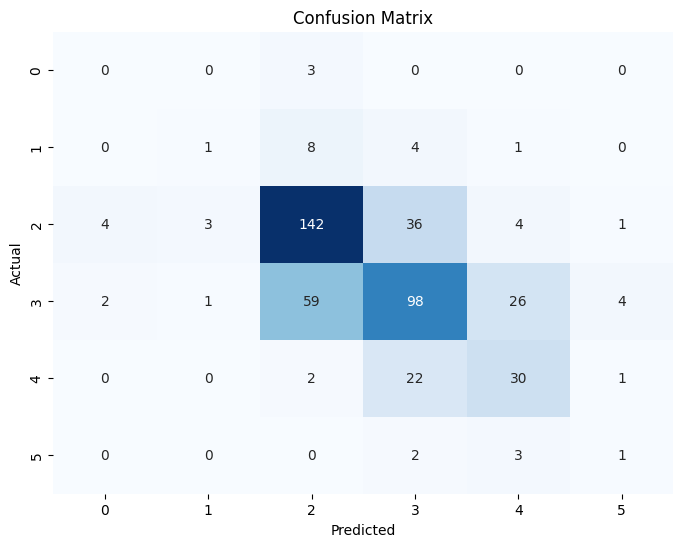

In [14]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
actual_labels, predicted_labels = gbc.do_boosting_prediction()

cm = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()